In [1]:
## import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

On this homework, we'll be looking at the Titanic dataset, which records the survival status of the passengers of the ship "Titanic", which sunk on its first voyage, in 1912.

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


For example, the first passenger listed  was a male, age 22, who did not survive.

### Part 1: One Dimensional Logistic Regression

In this first part of the homework, we'll build a classifier that predicts whether or not someone survived based only on their age.

In [4]:
p1a_df = df[["survived", "age"]].copy()
p1a_df = p1a_df.dropna() # drop entries with missing data
p1a_df = p1a_df.sort_values("age") # sort data by age, which will make it easier to plot the data nicely

Create a plot of the data in `p1a_df` showing survival on the y-axis and age on the x-axis.

You should add jitter to the y-axis to spread the points out. 

Does it look like older or younger people were more likely to survive?

Text(0, 0.5, 'survived')

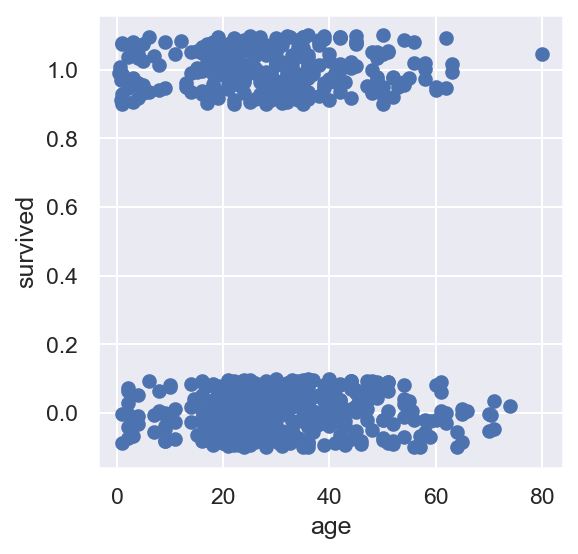

In [5]:
plt.plot(p1a_df['age'], p1a_df['survived']+np.random.uniform(-0.1, 0.1, len(p1a_df['survived'])), 'o')
plt.xlabel('age')
plt.ylabel('survived')

Train a logistic regression model `p1a_model` that tries to predict "survived" from "age".

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
p1a_model = LogisticRegression()
p1a_model.fit(p1a_df[['age']], p1a_df['survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now create a plot showing the jittered data overlaid with the probability of survival predicted by your model. 

Text(0, 0.5, 'survived')

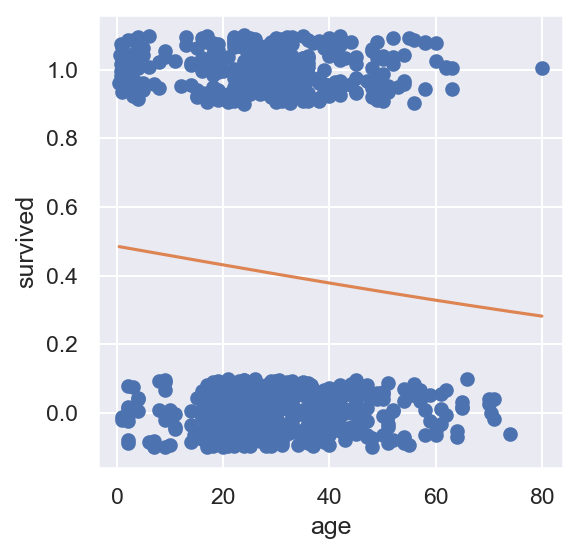

In [8]:
plt.plot(p1a_df[['age']], p1a_df['survived']+np.random.uniform(-0.1, 0.1, len(p1a_df['survived'])), 'o')
plt.plot(p1a_df[["age"]], p1a_model.predict_proba(p1a_df[["age"]])[:, 1])
plt.xlabel('age')
plt.ylabel('survived')

If done correctly, you should see that the probability is around 45% for 0 year olds and around 35% for a person who is 80.

In other words, younger people tended to survive, but not by much.

**Note:** You might ask why we don't see the S-shaped curve. The reason is that we are too zoomed in. If we look at people between -300 and 300 years old, we'll see the S. Of course, in the real world, a negative age is impossible, but the mathematical model does indeed have the S, as seen in the figure below.

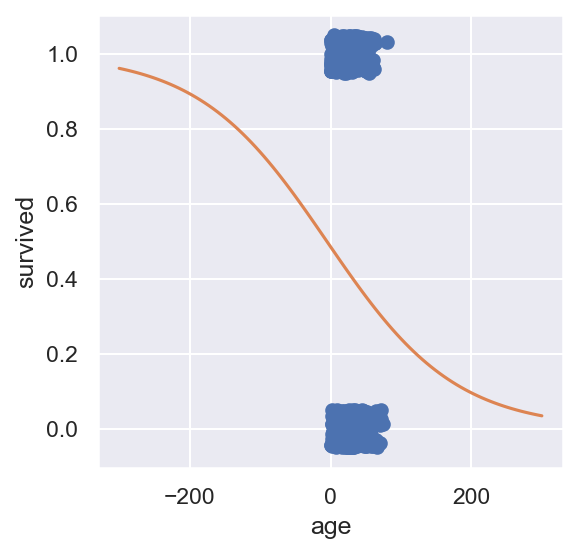

In [9]:
plt.plot(p1a_df["age"], p1a_df["survived"] + np.random.uniform(-0.05, 0.05, len(p1a_df["survived"])), 'o')
plt.xlabel("age")
plt.ylabel("survived") 
xdata = np.linspace(-300, 300, 100).reshape(-1, 1)
plt.plot(xdata, p1a_model.predict_proba(xdata)[:, 1])

#### P1B

In this part, we'll build another 1D model called `p1b_model` that tries to predict whether or not someone survived based on how much they paid for their ticket.

You'll need to start by creating a new dataframe called `p1b_df` that has "survived" and "fare" data. 

Once you've created your model, plot the model's predictions vs. the data just like you did at the end of p1a. 

You should see that the chance of survival for someone who paid a very low price was around 30%, but those who paid \$200 had a 90% chance of survival.

In [10]:
p1b_df = df[["survived", 'fare']].copy()
p1b_df=p1b_df.dropna()
p1b_df=p1b_df.sort_values('fare') # 排序后才可画出连续的线

In [11]:
p1b_df

,survived,fare
271,1,0.0000
597,0,0.0000
302,0,0.0000
633,0,0.0000
277,0,0.0000
...,...,...
438,0,263.0000
341,1,263.0000
737,1,512.3292
258,1,512.3292


In [12]:
p1b_df['fare'].max()

512.3292

In [13]:
p1b_model = LogisticRegression()
p1b_model.fit(p1b_df[['fare']], p1b_df['survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'survived')

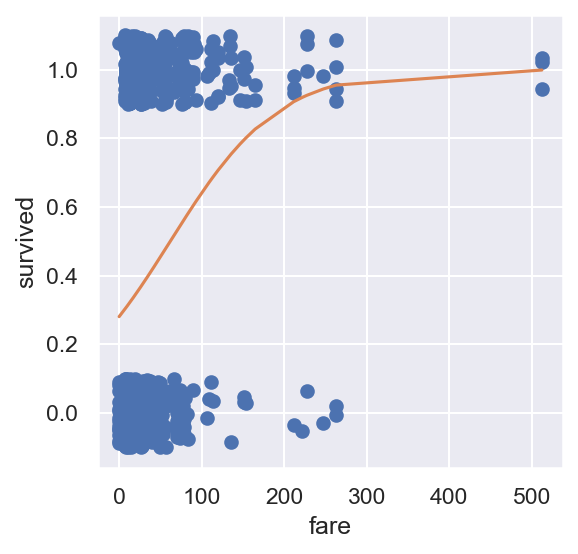

In [14]:
plt.plot(p1b_df[['fare']], p1b_df['survived']+np.random.uniform(-0.1, 0.1, len(p1b_df['survived'])), 'o')
plt.plot(p1b_df[["fare"]], p1b_model.predict_proba(p1b_df[["fare"]])[:, 1])
plt.xlabel('fare')
plt.ylabel('survived')

### P2: Two Dimensional Logistic Regression 

In this part, we'll build a model that gives a survival prediction probability based on both age AND fare.

In [15]:
p2a_df = df[["survived", "fare", "age"]].copy()
p2a_df = p2a_df.dropna() 

#### P2A: Training the Model

For this problem (2a) there is no code for you to write, but you should still run and understand the following pieces of code.

In [16]:
p2a_model = LogisticRegression()
p2a_model.fit(p2a_df[["fare", "age"]], p2a_df["survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Below, we can visualize the predictions on a contour plot, with fare on the x-axis and age on the y-axis:

In [17]:
xx, yy = np.meshgrid(np.linspace(0, 550, 20),
                     np.linspace(0, 80, 20))

p_survive = p2a_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
p_survive = p_survive.reshape(xx.shape)

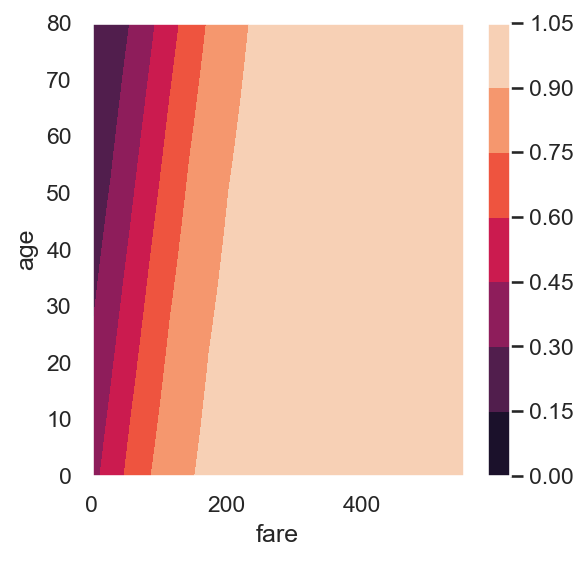

In [18]:
plt.contourf(xx, yy, p_survive)
plt.xlabel("fare")
plt.ylabel("age")
plt.colorbar()

If you have plotly installed, the code below makes a nicer looking plot:

In [ ]:
import plotly
import plotly.graph_objs as go

contour = go.Contour(x = xx[0, :], y = yy[:, 0], z = p_survive, colorscale='Viridis')
contour_fig = go.Figure(data=[contour])

contour_fig.update_layout(xaxis_title='fare',
                    yaxis_title='age')

plotly.offline.iplot(contour_fig)

#### P2B: Using the Model

Below, compute the probability of someone surviving if they paid \$50 for a ticket and were 35 years old according to your model. *Hint:* Use the `predict_proba` function of `p2a_model`.

In [21]:
p_survive_50_dollars_35_years_old = p2a_model.predict_proba([[50, 35]])
p_survive_50_dollars_35_years_old

array([[0.54224409, 0.45775591]])

Optional: Use the coefficient and intercept below to compute the same probability using the algebraic equation that defines logistic regression. Some key values are given below.

In [22]:
p2a_model.coef_

array([[ 0.01725818, -0.01757775]])

In [23]:
p2a_model.intercept_

array([-0.41706811])

In [24]:
p_survive_50_dollars_35_years_old_computed_manually = 1/(1+np.exp(0.4031-0.0172*50+0.0179*35))
p_survive_50_dollars_35_years_old_computed_manually

0.45770134187392447

#### P2C: Visualizing the Decision Regions

Below, create a plot showing the decision regions of your model.

Hint: The code will be very similar to the code from P2A, except that it should be using `predict` instead of `predict_proba`.

Note: To make your decision boundaries look better, when you call plt.contourf, assign `cmap = sns_cmap`. See the hw5 lecture for example code.

Text(0, 0.5, 'survived')

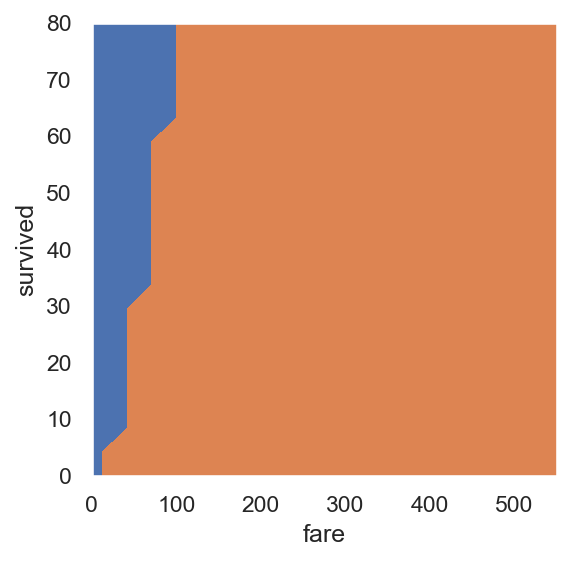

In [27]:
from matplotlib.colors import ListedColormap

# setting the cmap of your plot to sns_cmap  will make the decision boundary plot look nicer
# note: This doesn't work if you use plotly
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])


xx, yy=np.meshgrid(np.linspace(0,550, 20),
                  np.linspace(0, 80, 20))
survival_predictions=p2a_model.predict(np.c_[xx.ravel(), yy.ravel()])
survival_predictions=survival_predictions.reshape(xx.shape)

plt.contourf(xx, yy, survival_predictions, cmap=sns_cmap)
plt.xlabel('fare')
plt.ylabel('survived')

Now create the same plot, but with the original data overlaid on top. Your code should be exactly like the cell above, but should use the `sns.scatterplot` command similar to what you saw in the lecture 5 notebook.

Note: If you want to adjust the x and y axes, you can use `plt.xlim` and `plt.ylim`.

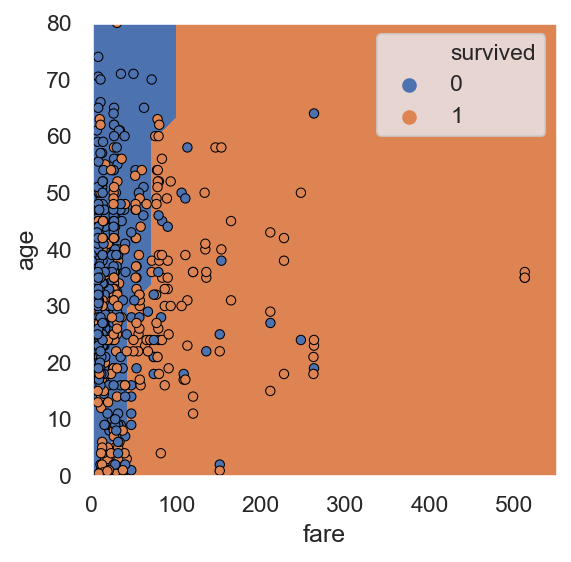

In [28]:
from matplotlib.colors import ListedColormap
# this will make the decision boundary plot look nicer

sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])


xx, yy = np.meshgrid(np.linspace(0, 550, 20),
                     np.linspace(0, 80, 20))

survival_predictions = p2a_model.predict(np.c_[xx.ravel(), yy.ravel()])
survival_predictions = survival_predictions.reshape(xx.shape)

plt.contourf(xx, yy, survival_predictions, cmap=sns_cmap)
plt.xlabel("fare")
plt.ylabel("age")
sns.scatterplot(data = p2a_df, x = "fare", y="age", hue="survived", s = 20, edgecolor = "black", linewidth = 0.5)
plt.xlim([0, 550])
plt.ylim([0, 80]);

#### P2C: Assessing Our Classifier

Compute the accuracy of your classifier. You should get a value near 65%.

In [29]:
survival_predictions = p2a_model.predict(p2a_df[["fare", "age"]])

In [30]:
p2a_df["survived"]

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [31]:
accuracy=sum(survival_predictions==p2a_df['survived'])/len(survival_predictions)
accuracy

0.6568627450980392

### Part 3: Multidimensional Classification

In this part, we'll use the `age`, `fare`, `pclass`, and `sex` of each passenger to build a logistic regression model. We'll also practice using a training set that is separate from the test set.

In [32]:
p3_df = df[["age", "fare", "pclass", "sex", "survived"]].copy()
p3_df = p3_df.dropna()

The `pclass` indicates the class of the passenger, and can be 1, 2, or 3.

In [33]:
p3_df['pclass'].value_counts()

3    355
1    186
2    173
Name: pclass, dtype: int64

`sex` refers to whether the passenger was male or female.

In [34]:
p3_df['sex'].value_counts()

male      453
female    261
Name: sex, dtype: int64

To use the sex, we'll need to replace "male" with 0, and "female" with 1.

In [35]:
p3_df['sex'] = p3_df['sex'].replace("male", 0)
p3_df['sex'] = p3_df['sex'].replace("female", 1)

In [36]:
p3_df.head(5)

,age,fare,pclass,sex,survived
0,22.0,7.2500,3,0,0
1,38.0,71.2833,1,1,1
2,26.0,7.9250,3,1,1
3,35.0,53.1000,1,1,1
4,35.0,8.0500,3,0,0


#### P3A: Splitting Our Data into a Training and a Test Set

Before splitting our data, let's shuffle it to avoid any issues when splitting into a training and test set.

In [37]:
np.random.seed(100) # sets the random seed for consistency every time you run the notebook
p3_df = p3_df.sample(frac=1) # shuffles the data

There are 714 people in our dataset.

In [38]:
len(p3_df)

714

Split the data into a training set of 600 people, and a test set of 114. *Hint:* Use `np.split`.

In [39]:
p3_train, p3_test = np.split(p3_df, [600])
len(p3_train)

600

#### P3B: Training and Assessing a 4 Feature Model

Fit a model `p3b_model` that uses all four of our features to predict survival. Make sure to ONLY use the training data.

In [40]:
p3b_model = LogisticRegression()
p3b_model.fit(p3_train[['fare', 'age', 'pclass', 'sex']], p3_train['survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In the cell below, compute the training set accuracy. You should get something close to 80%. This is great! This is significantly better than what we got with just the fare and age.

In [41]:
p3b_model.coef_

array([[ 1.13700252e-03, -3.59973150e-02, -1.14443309e+00,
         2.40443620e+00]])

In [42]:
training_predictions=p3b_model.predict(p3_train[['fare', 'age', 'pclass', 'sex']])
training_accuracy=sum(training_predictions==p3_train['survived'])/len(p3_train['survived'])
training_accuracy

0.795

Now compute the accuracy on the test set. You'll see that it is very close to your training accuracy. This is amazing news! It means that our model is not overfitting. Even without ever seeing the test data, our model was able to get around 79% of the passengers correct.

In [48]:
test_predictions=p3b_model.predict(p3_test[['fare', 'age', 'pclass', 'sex']])
test_accuracy = sum(test_predictions==p3_test['survived'])/len(p3_test['survived'])
test_accuracy

0.7807017543859649

#### P3C: Going Polynomial

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

It is possible that there is interaction between our terms. For example, the age of a passenger might have an effect that depends on the class of that passenger.

To capture these effects, create a new model `p3c_model` that has 16 features, corresponding to a degree 2 polynomial of our original 4 features.

Use the sklearn pipeline feature. Make sure to use a StandardScaler like in HW4. That is, your pipeline should have 3 steps: `StandardScaler`, `PolynomialFeatures`, and `LogisticRegression`.

For this problem, make sure to set `penalty = 'none'`. This will disable regularization. We'll discuss regularization in lecture 6.

**Note:** Because the `PolynomialFeatures` step already creates an intercept, it is slightly better practice to set `fit_intercept = False` in `LogisticRegression`, but this is not necessary.

In [47]:
p3c_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(2)),
    ('model', LogisticRegression(fit_intercept=False, penalty='none'))
])
p3c_model.fit(p3_train[['fare', 'age', 'pclass', 'sex']], p3_train['survived'])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Compute the training accuracy of your model below. It should be around 82%. It's an improvement over what we had before, implying the polynomial features do actually help, at least somewhat.

In [49]:
training_predictions=p3c_model.predict(p3_train[['fare', 'age', 'pclass', 'sex']])
training_accuracy=sum(training_predictions==p3_train['survived'])/len(p3_train['survived'])
training_accuracy

0.8316666666666667

Compute the test accuracy of your model below. You'll see it is somewhat lower (77%) than the training accuracy and also slightly lower than when we fit a model without polynomial features. This implies that there is potentially overfitting happening here.

In [51]:
test_predictions=p3c_model.predict(p3_test[['fare', 'age', 'pclass', 'sex']])
test_accuracy = sum(test_predictions==p3_test['survived'])/len(p3_test['survived'])
test_accuracy

0.7719298245614035

One quick note: We used the test set twice in this homework, once for p3b_model, and once for p3c_model. **In the real world, it would be absolutely inappropriate to pick p3c_model over p3b_model because of its test set performance.** You should never use the test set to pick a model, as this means you are effectively fitting your model to the test data.

#### Conclusion

In this homework, you built a classifier that was able to predict deaths on the Titanic with fairly decent accuracy. 

#### Optional P3D: High Degee Polynomial Model

Optionally, try fitting a degree 5 polynomial just like in p3c_model. Then compute the training and test accuracy. You should see that the training error is lower, but the test error is higher. This is a warning that we are overfitting. Note: You may need to set the `max_iter` in the `LogisticRegression` object to a larger number, e.g. 10000 or even 100000.

Again, make sure to set `penalty = 'none'`.

In the next lecture we will talk about regularization in the context of Logistic Regression.

In [62]:
p3d_model =  Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(5)),
    ('model', LogisticRegression(fit_intercept=False, penalty='none', max_iter=100000))
])
p3d_model.fit(p3_train[['fare', 'age', 'pclass', 'sex']], p3_train['survived'])

D:\Programing\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Now create a plot showing the jittered data overlaid with the probability of survival predicted by your model. 

In [63]:
training_predictions=p3d_model.predict(p3_train[['fare', 'age', 'pclass', 'sex']])
training_accuracy=sum(training_predictions==p3_train['survived'])/len(p3_train['survived'])
training_accuracy

0.8566666666666667

In [64]:
test_predictions=p3d_model.predict(p3_test[['fare', 'age', 'pclass', 'sex']])
test_accuracy = sum(test_predictions==p3_test['survived'])/len(p3_test['survived'])
test_accuracy

0.8245614035087719